<a href="https://colab.research.google.com/github/GU-DPM/pyDPM-notebook/blob/main/pyDPM_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python DPM Code

# Optional -- Reset Env

In [40]:
#@title Optional -- Rest Colab env
#@markdown Executing this cell will delete the checked out code and clear uploaded files

%%shell

rm -rf /content/simulation-repo/ /content/csv_result/ ||:
rm /content/*.csv ||:

# 1. Install Dependecies

In [41]:
#@title Install dependencies if required
#@markdown Executing this cell will check if the simulation code is 
#@markdown already available and if not will install it

%%shell 

cd /content/

if [ -d "simulation-repo" ]; then
  echo "simulation-repo already exists -- not cloning files"
elif [ ! -d "simulation-repo" ]; then
  echo "Cloning simulation files"
  git clone -l -s git@github.com:GU-DPM/python-simulation.git simulation-repo
fi


Cloning simulation files
Cloning into 'simulation-repo'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 32 (delta 11), reused 24 (delta 7), pack-reused 0
Receiving objects: 100% (32/32), 59.74 KiB | 14.93 MiB/s, done.
Resolving deltas: 100% (11/11), done.


# 2. Select Parameters

In [42]:
#@title Select the number of drugs
#@markdown Using the selection box, choose the number of drugs to use
#@markdown and execute the cell to confirm choice

num_drugs = 2 #@param [2, 3]

In [43]:
#@title Upload parameter csv
#@markdown Executing this code block will present an upload button to
#@markdown upload the csv file to be used as parameter input 
#@markdown file in the simulation

#@markdown Note: If multiple files are uploaded the upload will fail
!cd /content/

from google.colab import files
uploaded = files.upload()

length = len(uploaded.keys())

if (length > 1):
  raise RuntimeError("Expected one file but found {}".format(length))

parameter_csv = list(uploaded.keys())[0]

Saving example_DPM_parameter_2drug.csv to example_DPM_parameter_2drug.csv


In [44]:
#@title Upload misspecification csv
#@markdown Executing this code block will present an upload button to
#@markdown upload the misspecification csv file to be used as an input 
#@markdown file in the simulation

#@markdown Note: If multiple files are uploaded the upload will fail

from google.colab import files
uploaded = files.upload()

length = len(uploaded.keys())

if (length > 1):
  raise RuntimeError("Expected one file but found {}".format(length))

misspec_csv = list(uploaded.keys())[0]

Saving example_DPM_parameter_2drug_mis.csv to example_DPM_parameter_2drug_mis.csv


In [45]:
#@title Select strategies to simulate
#@markdown Toggle the strategies off or on to include in the simulation

#@markdown Execute the cell to confirm


strategy1 = True #@param {type:"boolean"}
strategy2_1 = True #@param {type:"boolean"}
strategy2_2 = True #@param {type:"boolean"}
strategy3 = True #@param {type:"boolean"}
strategy4 = True #@param {type:"boolean"}
strategy5 = True #@param {type:"boolean"}
strategy6 = True #@param {type:"boolean"}
strategy7 = True #@param {type:"boolean"}
strategy8 = True #@param {type:"boolean"}


strategies_list = []

if strategy1:
  strategies_list.append('strategy1')

if strategy2_1:
  strategies_list.append('strategy2.1')

if strategy2_2:
  strategies_list.append('strategy2.2')

if strategy3:
  strategies_list.append('strategy3')

if strategy4:
  strategies_list.append('strategy4')

if strategy5:
  strategies_list.append('strategy5')

if strategy6:
  strategies_list.append('strategy6')

if strategy7:
  strategies_list.append('strategy7')

if strategy8:
  strategies_list.append('strategy8')


strategies = ' '.join(strategies_list)

In [46]:
#@title Choose integer index of parameters
#@markdown Select the integer index of parameters

#@markdown Execute the cell to confirm

par_ind = 0 #@param {type:"slider", min:0, max:100, step:1}

In [32]:
#@title View parameters
#@markdown Execute this cell to view parameters before running simulation

print('num_drugs = {}'.format(num_drugs))
print('parameter_csv = {}'.format(parameter_csv))
print('misspec_csv = {}'.format(misspec_csv))
print('strategies = {}'.format(strategies))
print('par_ind = {}'.format(par_ind))

num_drugs = 2
parameter_csv = example_DPM_parameter_2drug.csv
misspec_csv = example_DPM_parameter_2drug_mis.csv
strategies = strategy1 strategy2.1 strategy2.2 strategy3 strategy4 strategy5 strategy6 strategy7 strategy8
par_ind = 0


# 3. Execute Simulation

In [47]:
#@markdown Execute this cell to run the simulation with the above parameters

from google.colab import files

!python3 /content/simulation-repo/DPM_cl.py run_par_csv \
--num_drug $num_drugs \
--filename_csv $parameter_csv \
--misspecification_filename_csv $misspec_csv \
--strategy $strategies \
--par_ind $par_ind

The directory for saving results is set to:
/content/csv_result
Runing simulation for the parameters from .csv file input: 100%|████████████████████████████████████| 1/1 [00:13<00:00, 13.05s/it]


# 4. Display Plots

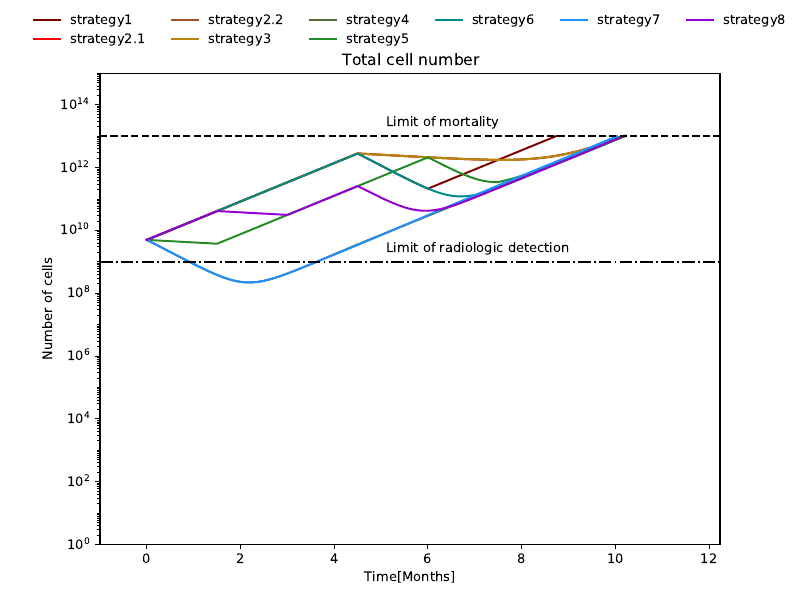

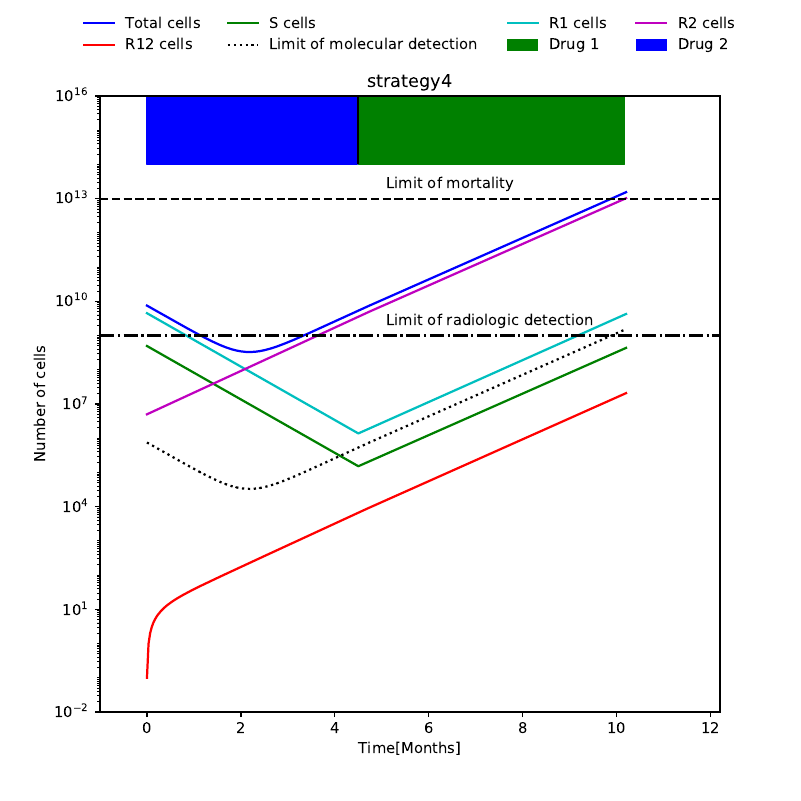

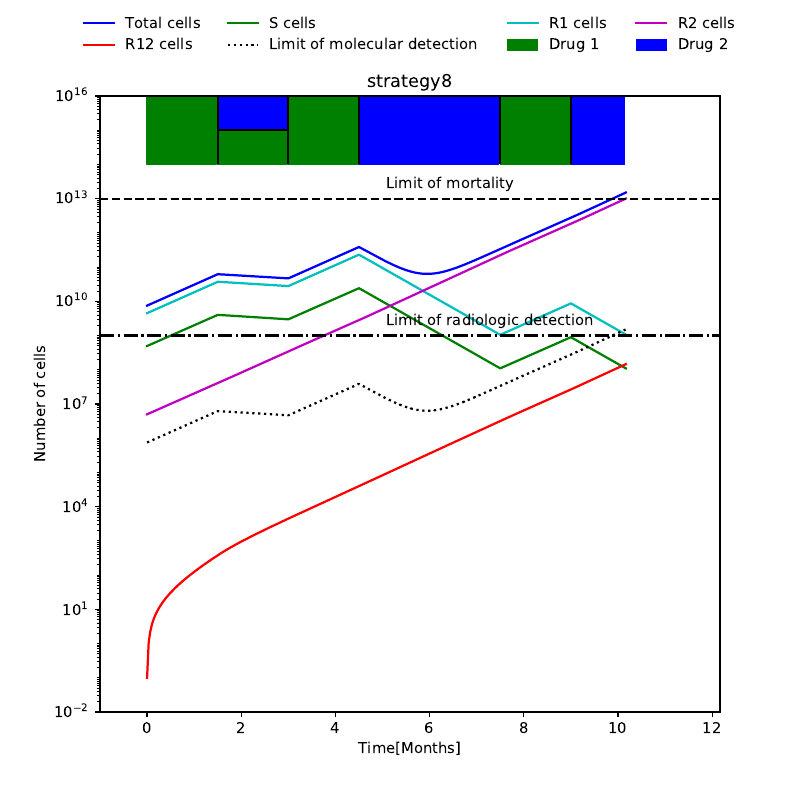

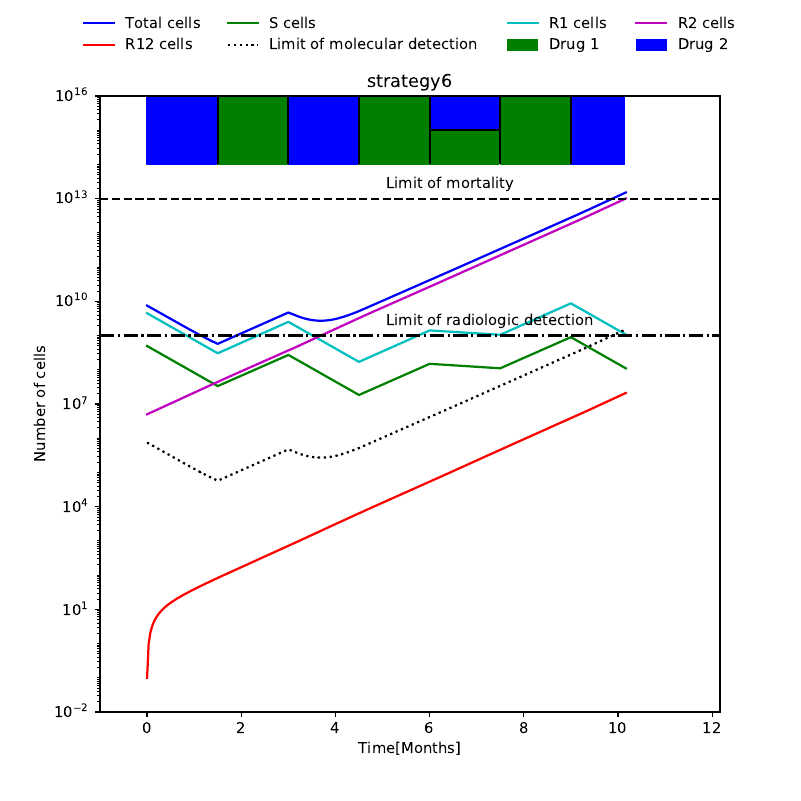

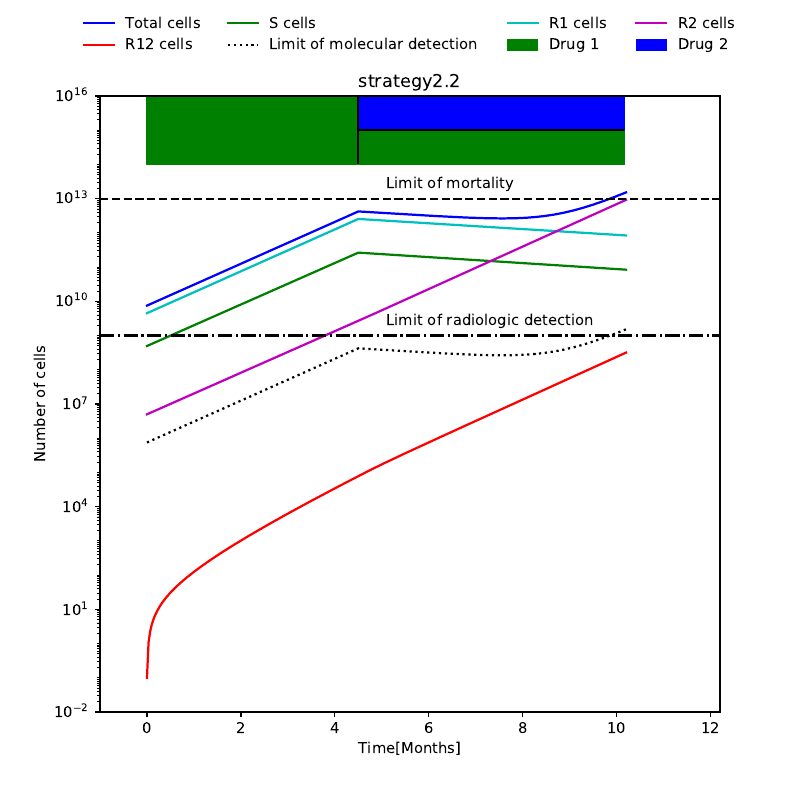

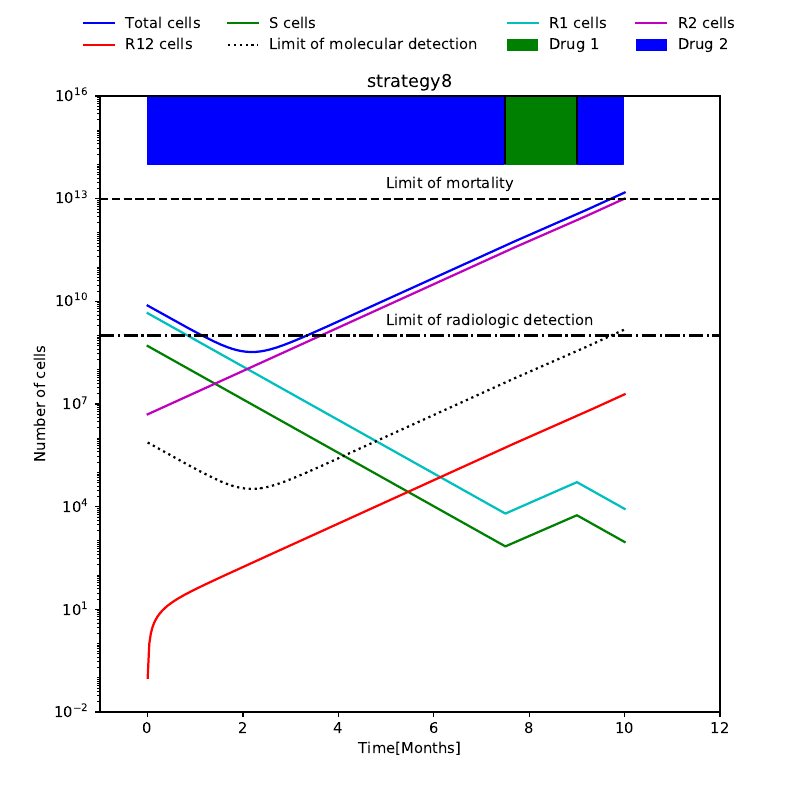

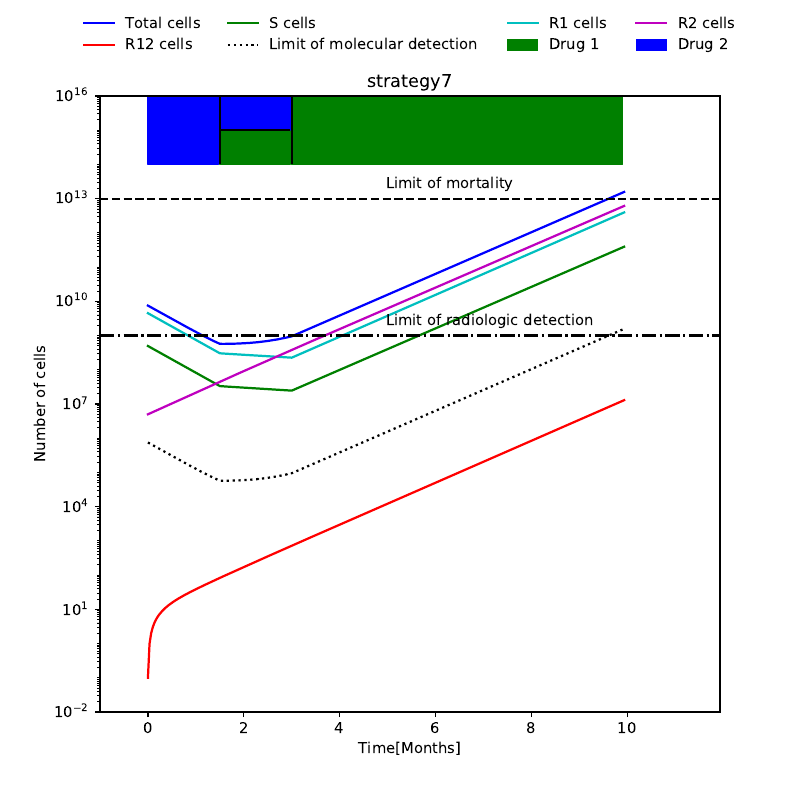

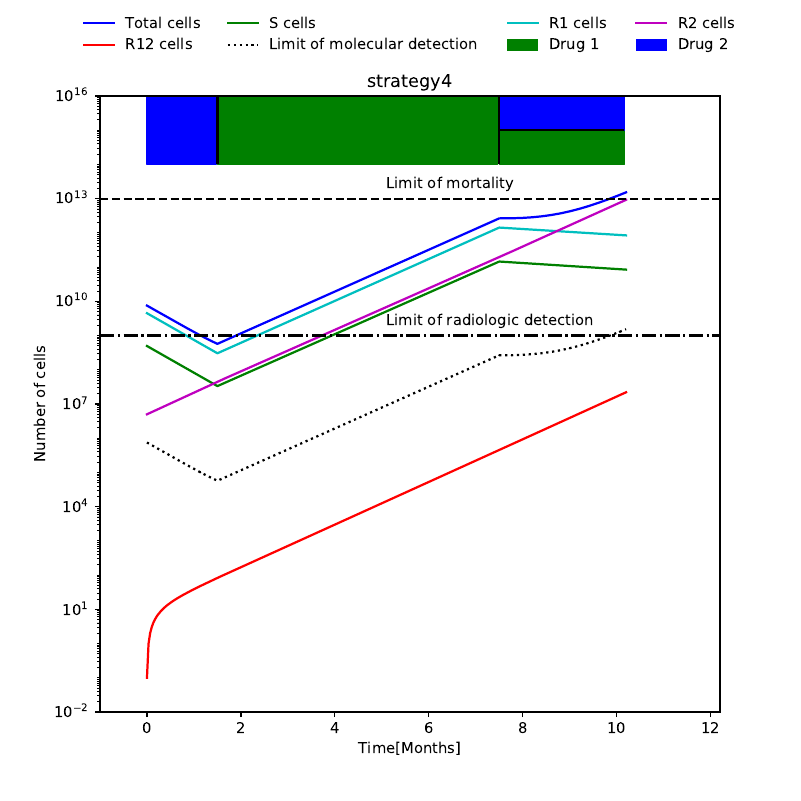

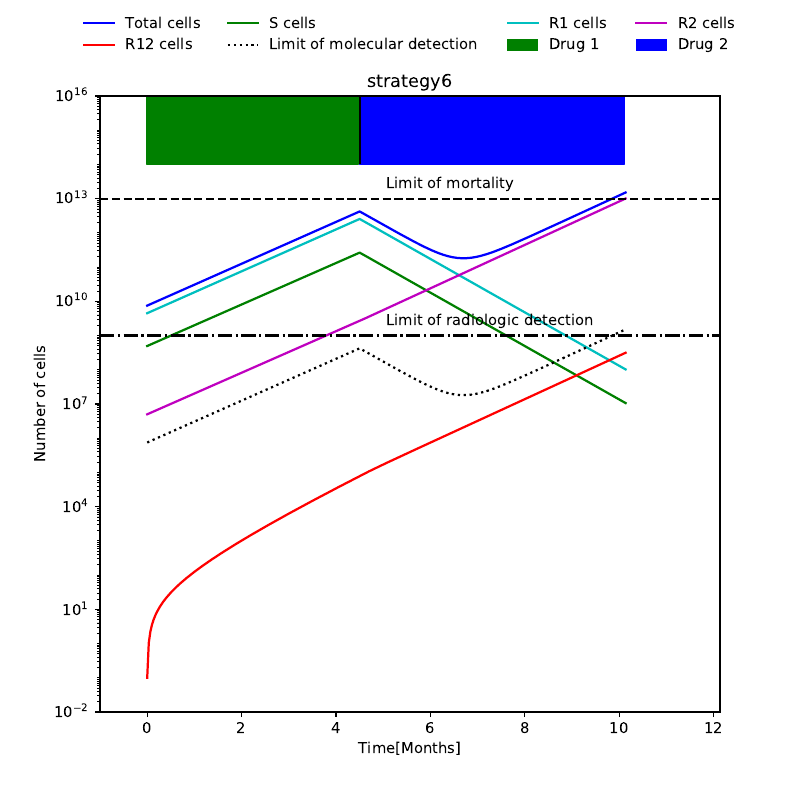

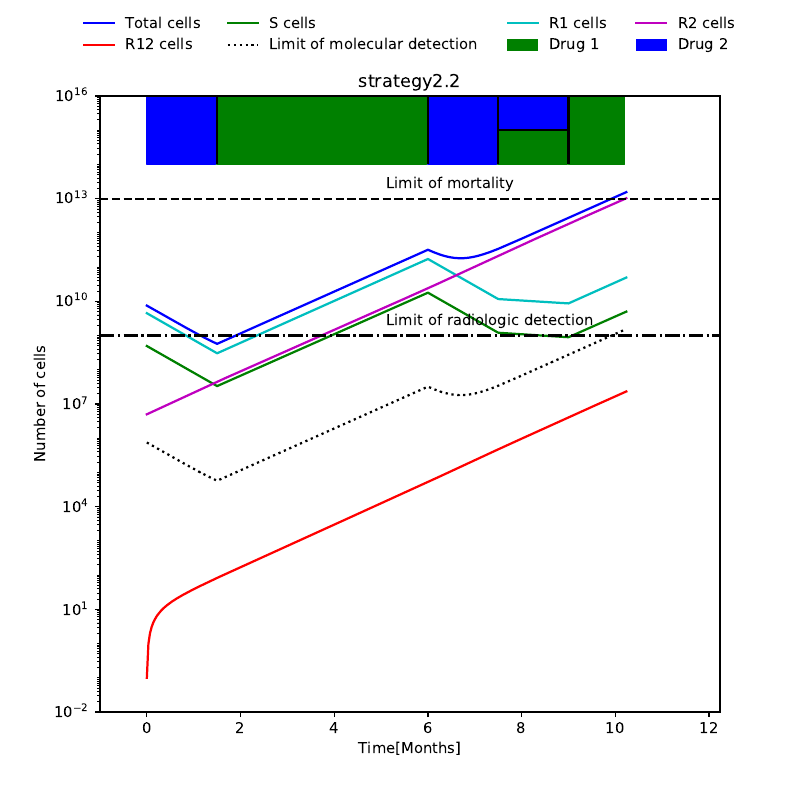

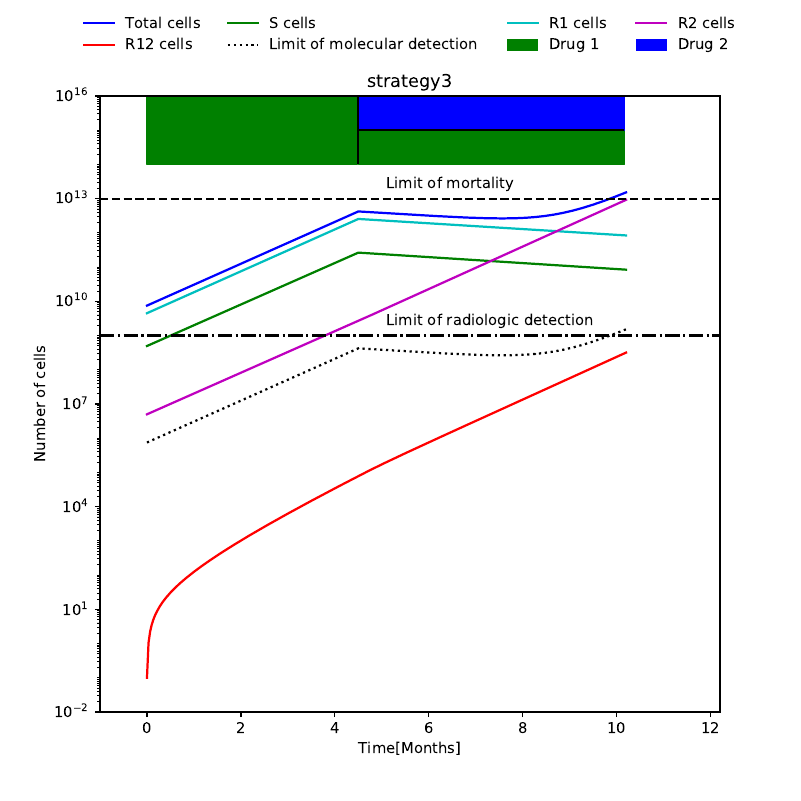

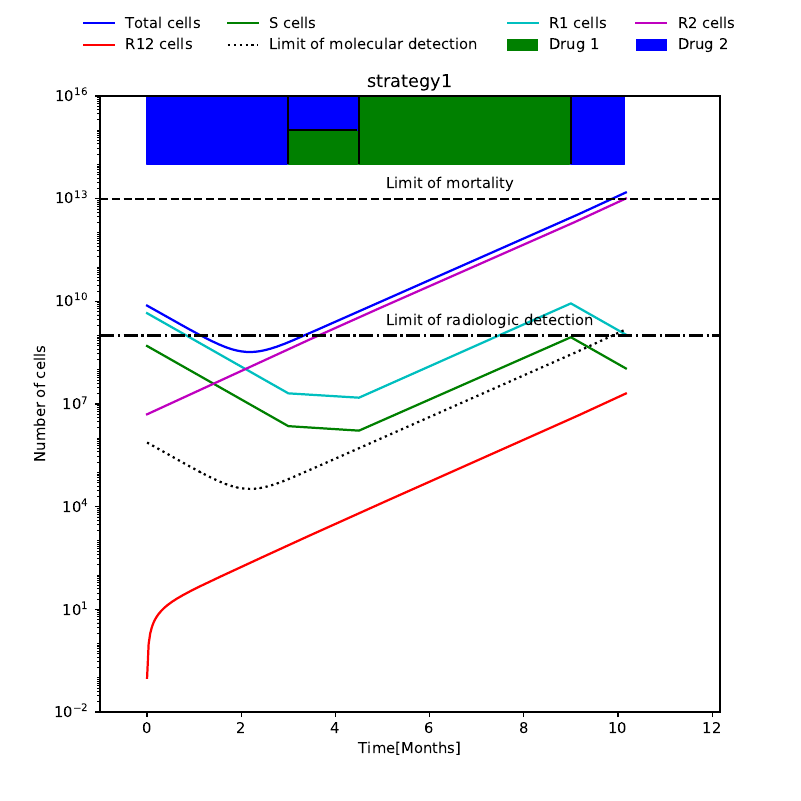

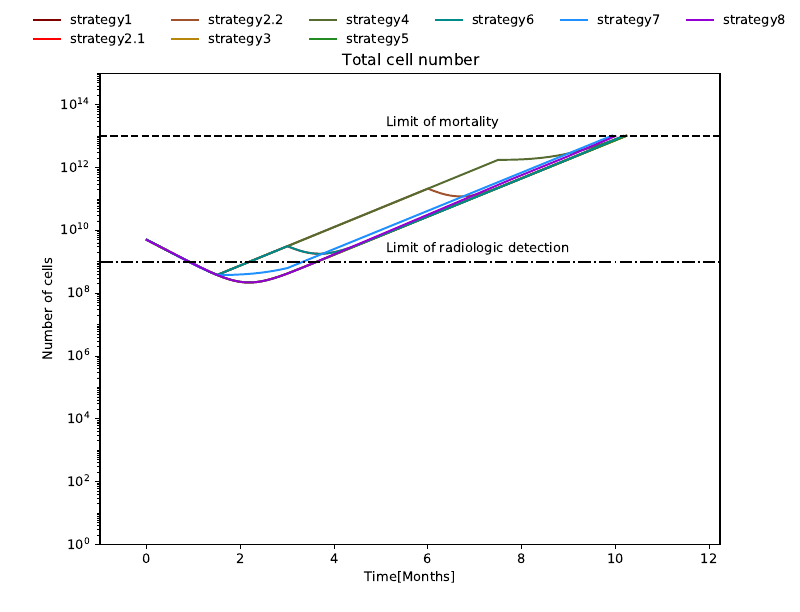

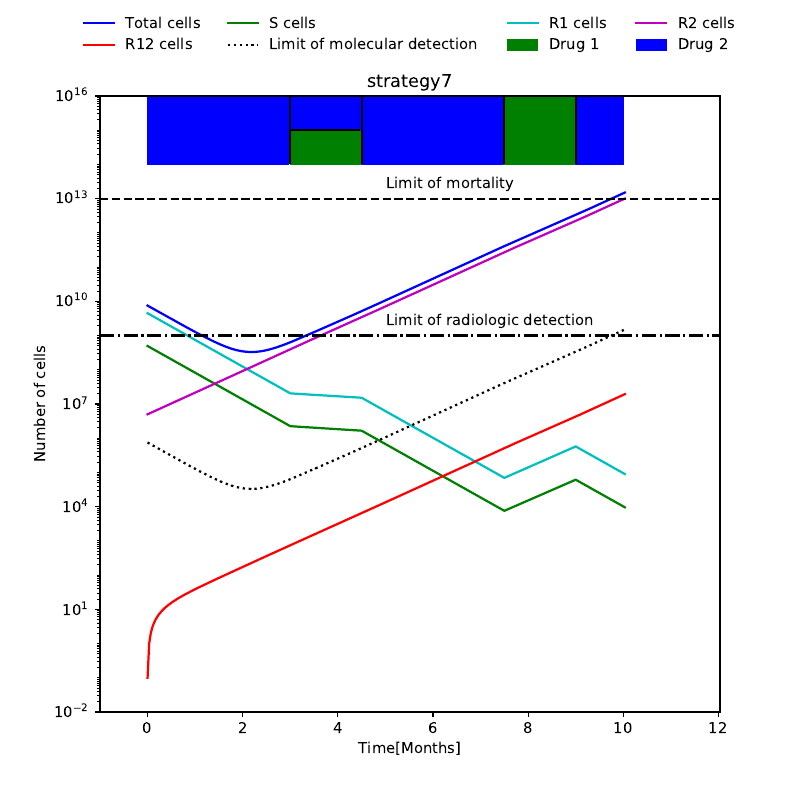

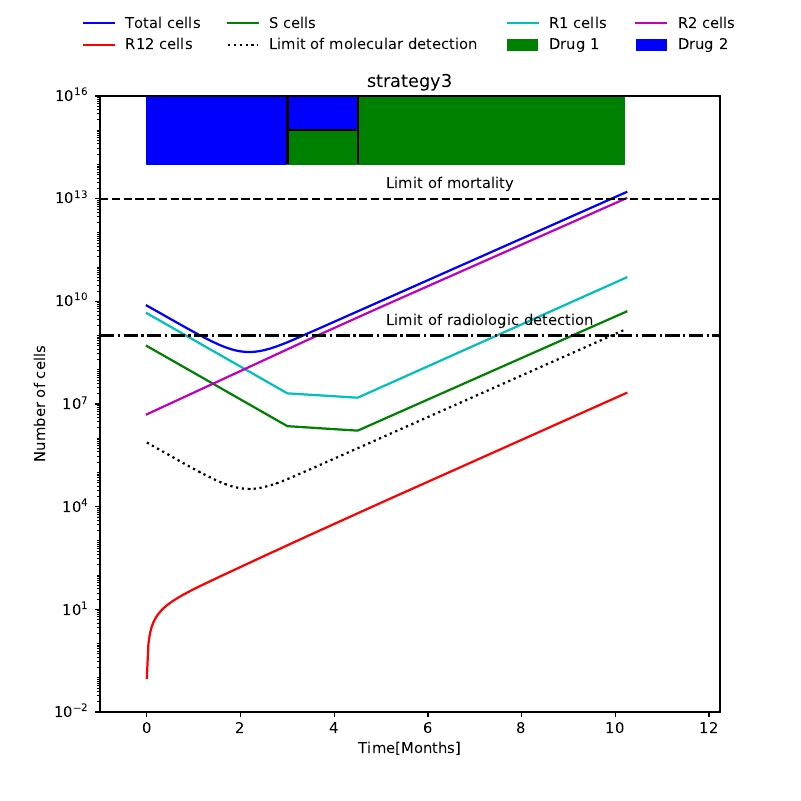

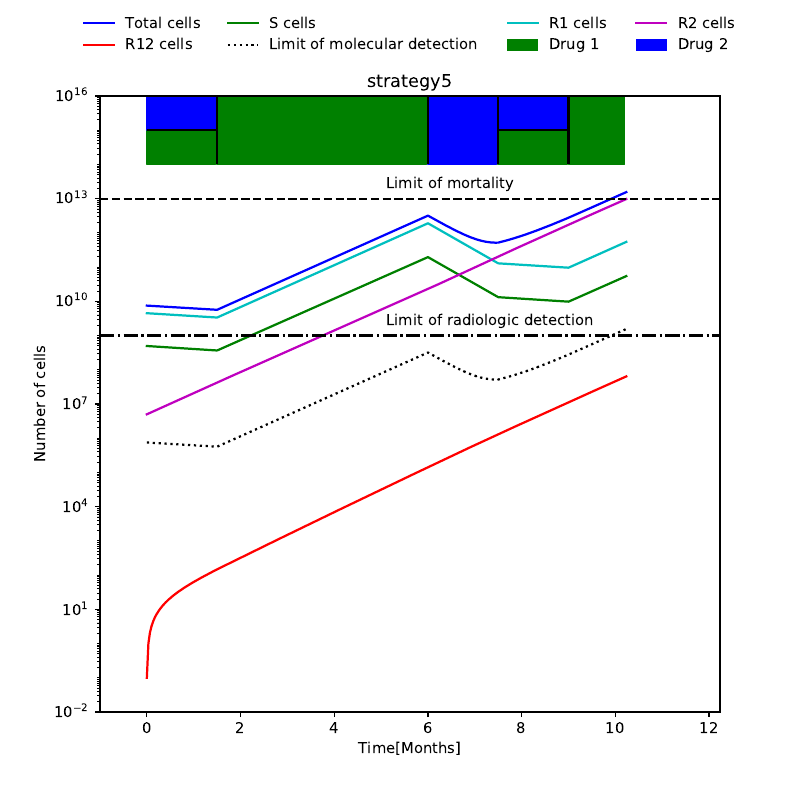

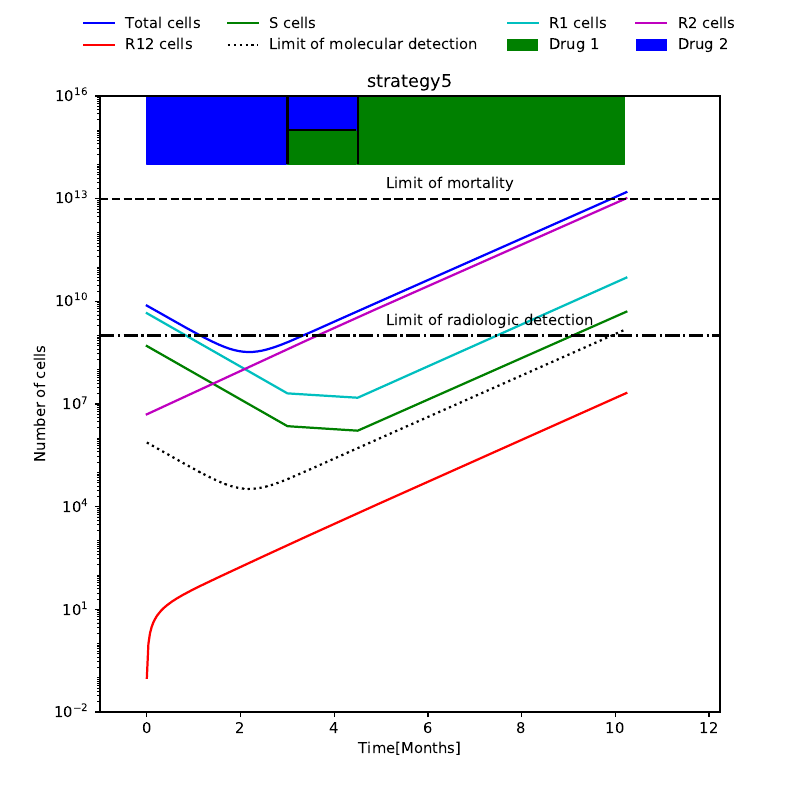

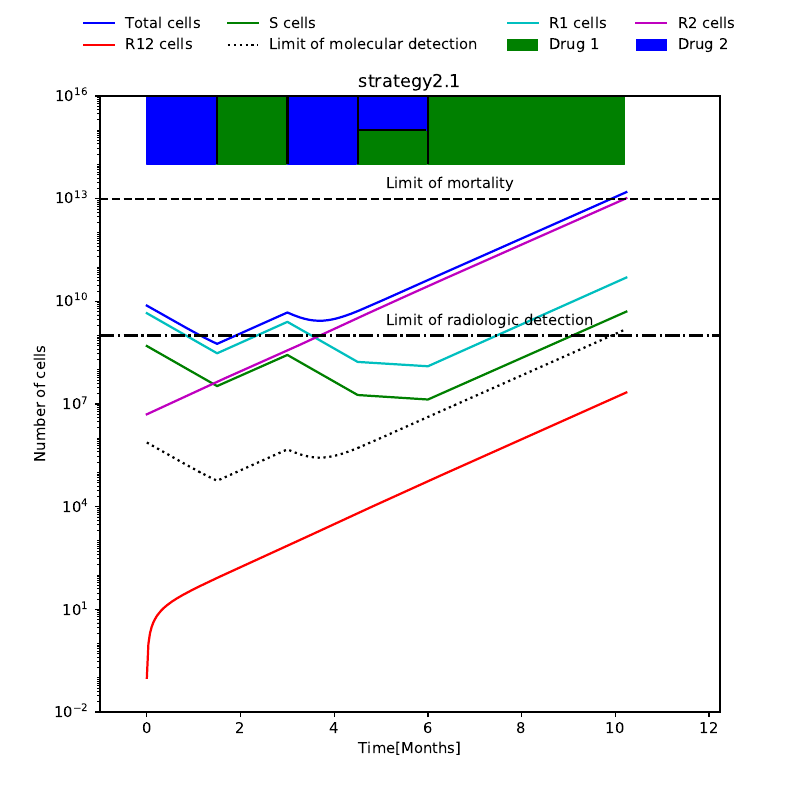

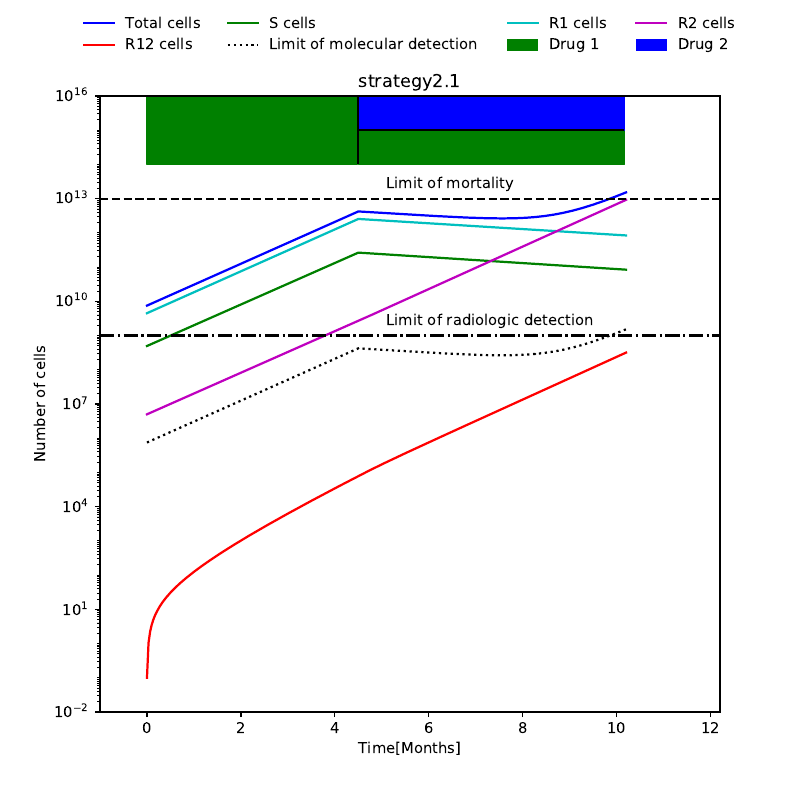

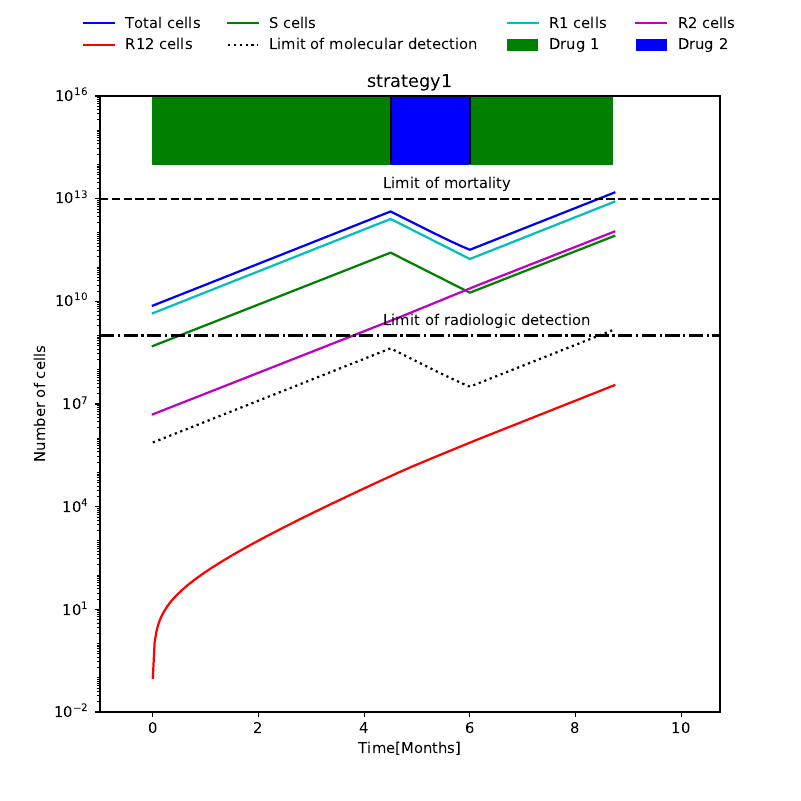

In [51]:
#@markdown Execute this cell to display all plots generated from the simulation
import os
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image

for f in os.listdir('/content/csv_result'):
  if f.endswith('.pdf'):
    path = '/content/csv_result/' + f
    images = convert_from_bytes(open(path, 'rb').read(), size=800)
    display(images[0])